In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer



In [46]:
# Load the dataset
df = pd.read_csv(r"C:\Users\dell\Desktop\house\archive (11)\house_prices.csv")

In [47]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [48]:
df.tail()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,NaN,NaN
187530,187530,3 BHK Ready to Occupy Flat for sale in Affinit...,This exquisite 3 BHK Flat is offered for sale ...,1.18 Cr,6162.0,zirakpur,NaN,Ready to Move,5 out of 13,Resale,...,North - East,"Garden/Park, Pool",Affinity Greens,4,4,1 Covered,Freehold,1915 sqft,NaN,NaN


In [49]:
# Drop irrelevant or highly missing columns
df.drop(columns=['Index', 'Description', 'Super Area', 'Dimensions', 'Plot Area'], inplace=True)

In [50]:
# -------- Convert "Amount(in rupees)" to Numeric --------
def convert_amount(value):
    value = str(value).strip()
    if 'Cr' in value:
        return float(value.replace('Cr', '').strip()) * 10000000
    elif 'Lac' in value:
        return float(value.replace('Lac', '').strip()) * 100000
    else:
        try:
            return float(value.replace(',', '').strip())
        except:
            return np.nan

In [51]:

df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_amount)

In [52]:
# Drop rows with missing target
df.dropna(subset=['Amount(in rupees)'], inplace=True)



In [53]:
# Identify features and target
y = df['Amount(in rupees)']
X = df.drop(columns=['Amount(in rupees)'])

C:\Users\dell\AppData\Local\Temp\ipykernel_872\2760068775.py:8: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


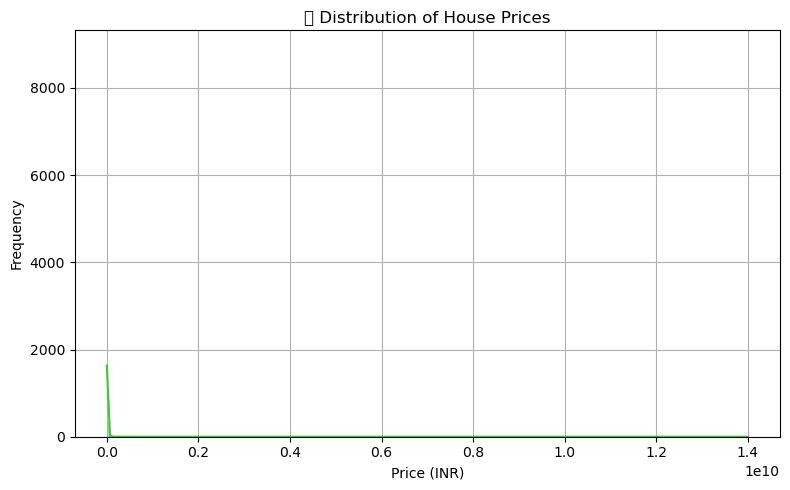

In [54]:
# -------- Step 2: Show Target Distribution --------
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount(in rupees)'], kde=True, color='limegreen')
plt.title("🏠 Distribution of House Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# -------- Handle Missing Values --------
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include='object').columns

In [56]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [57]:

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

In [58]:
# -------- Label Encoding for Categorical Variables --------
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [59]:
# -------- Feature Scaling --------
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])




In [60]:
# -------- Train-Test Split --------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Shapes of processed data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (142277, 15)
y_train shape: (142277,)
